# Insert Title Here

## Imports

Basic Libraries

- numpy contains a large collection of mathematical functions
- pandas contains functions that are designed for data manipulation and data analysis

In [1]:
import numpy as np
import pandas as pd

Visualization Libraries

- matplotlib.pyplot contains functions to create interactive plots
- seaborn is a library based on matplotlib that allows for data visualization
- spacy is a Python-based open-source library used in processing text data.
- wordcloud contains functions for generating wordclouds from text data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS

Natural Language Processing Libraries

- re is a module that allows the use of regular expressions
- nltk provides functions for processing text data
- stopwords is a corpus from NLTK, which includes a compiled list of stopwords
- Counter is from Python's collections module, which is helpful for tokenization
- string contains functions for string operations
- TFidfVectorizer converts the given text documents into a matrix, which has TF-IDF features
- CountVectorizer converts the given text documents into a matrix, which has the counts of the tokens

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk import wordpunct_tokenize
from nltk import download, classify, corpus
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk import ngrams

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('words')

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/admin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /Users/admin/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [5]:
from collections import Counter
import string

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

# Dataset Files

The following .csv files will be used in this project:

- rap_dataframe.csv = contains the content of the articles, author, and link that is scraped from the Rappler website.
- gma_dataframe.csv and gma-10000.csv = contains the content of the articles, author, and link that is scraped from the GMA website.
- fake_or_real_news.csv = contains the content of the article and the two label namely REAL and FAKE. Retrieved from "Fake or Real News" in Kaggle
- fake news dataset.csv =  similar to fake_or_real_news.csv but its two label is numbered

## Data Collection

After importing all the necessary libraries that we would need, the next thing we would need to do is import the different .csv files from different sources into the notebook using the read_csv function. After this, the head function will also be used to check the first few rows of the dataset. This will let us have a glance on the features of each dataset and what type of data each feature has.

## Importing News Sites Data

For our News Sites Data (the real news data), we have scraped two news data from the Rappler website and GMA website.

### Rappler Data

First is the Rappler Data, which will be loaded using the read_csv and stored into a DataFrame named df_Rappler.

In [7]:
df_Rappler = pd.read_csv('/Users/admin/Desktop/FakeNews/rap_dataframe.csv')
df_Rappler.head()

,Link,Author,Content
0,https://www.rappler.com/life-and-style/literat...,[],"MANILA, Philippines – Finally! Best-selling Ja..."
1,https://www.rappler.com/nation/new-findings-ki...,['JAIRO BOLLEDO'],"MANILA, Philippines – The results of the lates..."
2,https://www.rappler.com/sports/football/tom-br...,[],Tom Brady was the ultimate winner on the field...
3,https://www.rappler.com/life-and-style/health-...,[],It’s one thing to know what makes people happy...
4,https://www.rappler.com/entertainment/music/ju...,[],Justin Bieber is the latest artist in a growin...


### GMA Data

For our GMA Data, we scraped two data. These two data will also be loaded using the read_csv, and stored into DataFrames separately that we will be naming df_gma1 and df_gma2.

In [8]:
df_gma1 = pd.read_csv('/Users/admin/Downloads/gma-10000.csv')
df_gma1.head()

,Unnamed: 0,Link,Author,Content
0,0,https://www.gmanetwork.com/news/balitambayan/p...,[],Arestado ng Laguna Police ang isang elementary...
1,1,https://www.gmanetwork.com/news/topstories/reg...,['By GMA Integrated News'],A barangay kagawad was shot dead in front of b...
2,2,https://www.gmanetwork.com/news/topstories/wor...,[],"GENEVA, Switzerland - Taliban restrictions on ..."
3,3,https://www.gmanetwork.com/news/topstories/nat...,['By GMA Integrated News'],The National Privacy Commission (NPC) has issu...
4,4,https://www.gmanetwork.com/news/topstories/wor...,[],"STOCKHOLM, Sweden - More than 600 young people..."


In [9]:
df_gma2 = pd.read_csv('/Users/admin/Downloads/gma_dataframe.csv')
df_gma2.head()

,Link,Author,Content
0,https://www.gmanetwork.com/news/topstories/wor...,[],BEIJING - China lashed out at the United State...
1,https://www.gmanetwork.com/news/topstories/met...,['By GMA Integrated News'],"Two people were arrested in Tondo, Manila for ..."
2,https://www.gmanetwork.com/news/topstories/nat...,"['By JOVILAND RITA, GMA Integrated News']",Former Bureau of Corrections (BuCor) chief Ger...
3,https://www.gmanetwork.com/news/balitambayan/b...,[],"Dalawa katao ang arestado sa Tondo, Maynila da..."
4,https://www.gmanetwork.com/news/balitambayan/p...,[],"NEW YORK CITY — Nasa 9,000 nurse na nagtatraba..."


After loading and storing it into two separate DataFrames, we will now be merging it together into one single DataFrame using concat( ).

In [10]:
df_GMA = pd.concat([df_gma1,df_gma2], ignore_index=True)
df_GMA

,Unnamed: 0,Link,Author,Content
0,0.0,https://www.gmanetwork.com/news/balitambayan/p...,[],Arestado ng Laguna Police ang isang elementary...
1,1.0,https://www.gmanetwork.com/news/topstories/reg...,['By GMA Integrated News'],A barangay kagawad was shot dead in front of b...
2,2.0,https://www.gmanetwork.com/news/topstories/wor...,[],"GENEVA, Switzerland - Taliban restrictions on ..."
3,3.0,https://www.gmanetwork.com/news/topstories/nat...,['By GMA Integrated News'],The National Privacy Commission (NPC) has issu...
4,4.0,https://www.gmanetwork.com/news/topstories/wor...,[],"STOCKHOLM, Sweden - More than 600 young people..."
...,...,...,...,...
16001,NaN,https://www.gmanetwork.com/news/topstories/wor...,"['By SOO-HYANG CHOI, Reuters']",SEOUL - North Korea said on Sunday it had test...
16002,NaN,https://www.gmanetwork.com/news/topstories/wor...,[],Former US President Jimmy Carter has decided t...
16003,NaN,https://www.gmanetwork.com/news/topstories/reg...,['By GMA Integrated News'],The search for the Cessna plane which went mis...
16004,NaN,https://www.gmanetwork.com/news/topstories/reg...,['By GMA Integrated News'],The search and rescue operations for the missi...


## Importing Fake News Data

Just like what we did in our first two data, we will also load the two Fake News Data that we have scraped using the read_csv, and stored into separate DataFrames, df_fakenews1, and df_fakenews2. 

The 'article' column in df_fakenews1 will be renamed as 'Content' using the rename ( ), so that it would match the column name of the News Sites Data which contains the article news.

In [11]:
df_fakenews1 = pd.read_csv('/Users/admin/Desktop/FakeNews/fake news dataset.csv')
df_fakenews1.rename(columns={'article': 'Content'}, inplace=True) #renamed column
df_fakenews1.head()

,label,Content
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...


Similarly, in df_fakenews2, the 'text' column is renamed to 'Content'. 

In [12]:
df_fakenews2 = pd.read_csv('/Users/admin/Desktop/FakeNews//fake_or_real_news.csv')
df_fakenews2 = df_fakenews2.rename(columns={'text': 'Content'}) #renamed column
df_fakenews2.head()

,Unnamed: 0,title,Content,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


As it can be seen in df_fakenews2, its 'label' column doesn't have the numerical value like what we see in the 'label' column of df_fakenews1. With that, we will be raplacing the existing values 'REAL' and 'FAKE' with 0 and 1, respectively, using the replace ( ).

In [13]:
#assigning new values (raplacing the existing values 'REAL' and 'FAKE' with 0 and 1, respectively in the 'label' column)
df_fakenews2['label'] = df_fakenews2['label'].replace({'REAL': 0, 'FAKE': 1})
df_fakenews2.head()

,Unnamed: 0,title,Content,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


After that, we will be replacing 0 with 1, and 1 with 0. So, it would turn out that those rows that has a value of 1 will signify a label of FAKE, while those that has a value of 0 will signify a label of REAL. The reason for this is that the News Sites Data doesn't have a 'label' column. So that, when all the data will be merged all together later on, the rows of the News Sites Data will have a 0 value in the 'label' column signifying that it is a REAL news.

In [14]:
df_fakenews2['label'] = df_fakenews2['label'].replace({0: 1, 1: 0})
df_fakenews2.head()

,Unnamed: 0,title,Content,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


After that, the two separate DataFrames then is merged together, df_fakenews1 and df_fakenews2, into a single DataFrame called df_FakeNews.

In [15]:
#combining two dataset into a single DataFrame
df_FakeNews = pd.concat([df_fakenews1, df_fakenews2], ignore_index=True)
df_FakeNews

,label,Content,Unnamed: 0,title
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",NaN,NaN
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...,NaN,NaN
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",NaN,NaN
3,0,"Kasama sa programa ang pananalangin, bulaklak ...",NaN,NaN
4,0,Linisin ang Friendship Department dahil dadala...,NaN,NaN
...,...,...,...,...
9536,1,The State Department told the Republican Natio...,4490.0,State Department says it can't find emails fro...
9537,0,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,8062.0,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
9538,0,Anti-Trump Protesters Are Tools of the Oligar...,8622.0,Anti-Trump Protesters Are Tools of the Oligarc...
9539,1,"ADDIS ABABA, Ethiopia —President Obama convene...",4021.0,"In Ethiopia, Obama seeks progress on peace, se..."


# Description of the Dataset

Using the shape function, the number of rows and columns can be obtained for all dataframes collected. The df_FakeNews has 9541 rows (instances) and four (4) columns (features). The df_Rappler has 1202 rows (instances) and three (3) columns (features) The df_GMA has 160006 rows (instances) and four (4) columns (features).

In [16]:
#getting the shape of the three datasets
display("df_FakeNews",df_FakeNews.shape,
        "df_Rappler", df_Rappler.shape, 
        "df_GMA", df_GMA.shape)

'df_FakeNews'

(9541, 4)

'df_Rappler'

(1202, 3)

'df_GMA'

(16006, 4)

The info function provides information about a DataFrame including the index data type and columns, non-null values, and memory usage. The main reason for running this function is to see the data types of all the columns in each Dataframe.


In [17]:
print(df_FakeNews.info(), df_Rappler.info(), df_GMA.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9541 entries, 0 to 9540
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       9541 non-null   int64  
 1   Content     9541 non-null   object 
 2   Unnamed: 0  6335 non-null   float64
 3   title       6335 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 298.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Link     1202 non-null   object
 1   Author   1202 non-null   object
 2   Content  1201 non-null   object
dtypes: object(3)
memory usage: 28.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16006 entries, 0 to 16005
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9785 non-null   float64
 1   Link        1600

After seeing the number of features in each column per dataset, all of the DataFrames, df_FakeNews, df_Rappler, and df_GMA, contains null values.

# Data Processing

For data pre-processing, we checked if the three DataFrames we collected has NaN values or any duplicates. Since all DataFrames has null values, we will be using fillna(' ') to avoid significant data loss and retain valuable information that might be present in other parts of the dataset.

In [18]:
df_FakeNews.fillna(' ', inplace=True)
df_Rappler.fillna(' ', inplace=True)
df_GMA.fillna(' ', inplace=True)

After checking the total number of null values in the whole of the three datasets, we can see it is equal to zero.

In [19]:
display("df_FakeNews",df_FakeNews.isnull().sum().sum(),
        "df_Rappler", df_Rappler.isnull().sum().sum(), 
        "df_GMA", df_GMA.isnull().sum().sum())

'df_FakeNews'

0

'df_Rappler'

0

'df_GMA'

0

To ensure the quality and accuracy of the data in the analysis, we will also be  removing duplicated rows in the datasets using drop_duplicates( ) so that potential biases or issues can be avoided that may arise when dealing with duplicated information.

The df_FakeNews now has 9340 rows, the df_Rappler still has 1202 rows, which means that it has no rows that is duplicated, and the df_GMA now has 13498 rows.

In [20]:
# Drop duplicates
df_FakeNews = df_FakeNews.drop_duplicates()
df_FakeNews.shape

(9340, 4)

In [21]:
df_Rappler = df_Rappler.drop_duplicates()
df_Rappler.shape

(1202, 3)

In [22]:
df_GMA = df_GMA.drop_duplicates()
df_GMA.shape

(13498, 4)

All datasets are merged together into one DataFrame. 

In [23]:
df_News = pd.concat([df_FakeNews,df_Rappler, df_GMA], ignore_index=True)
df_News

,label,Content,Unnamed: 0,title,Link,Author
0,0.0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",,,NaN,NaN
1,0.0,Kilala rin ang singer sa pagkumpas ng kanyang ...,,,NaN,NaN
2,0.0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",,,NaN,NaN
3,0.0,"Kasama sa programa ang pananalangin, bulaklak ...",,,NaN,NaN
4,0.0,Linisin ang Friendship Department dahil dadala...,,,NaN,NaN
...,...,...,...,...,...,...
24035,NaN,The winner of the special election in Cavite t...,,NaN,https://www.gmanetwork.com/news/topstories/reg...,"['By RICHA NORIEGA, GMA Integrated News']"
24036,NaN,The remains of four people inside the Cessna p...,,NaN,https://www.gmanetwork.com/news/topstories/reg...,"['By RICHA NORIEGA, GMA Integrated News']"
24037,NaN,A Kabataan Party-list representative visited t...,,NaN,https://www.gmanetwork.com/news/topstories/nat...,[]
24038,NaN,The Philippine Coast Guard is expected to have...,,NaN,https://www.gmanetwork.com/news/topstories/nat...,"['By RICHA NORIEGA, GMA Integrated News']"


As the df_Rappler and df_GMA originally does not have a 'label' column, we will be using fillna( ) to fill those rows with a value of 0 on the 'label' column as to signiy that it is a REAL news and not FAKE news which has a value of 1 in the 'label' column. We use the astype(int) for the 'label' column so that the values within that column will be concerted into integer data type.

In [24]:
df_News['label'] = df_News['label'].fillna(0).astype(int)
df_News

,label,Content,Unnamed: 0,title,Link,Author
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",,,NaN,NaN
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...,,,NaN,NaN
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",,,NaN,NaN
3,0,"Kasama sa programa ang pananalangin, bulaklak ...",,,NaN,NaN
4,0,Linisin ang Friendship Department dahil dadala...,,,NaN,NaN
...,...,...,...,...,...,...
24035,0,The winner of the special election in Cavite t...,,NaN,https://www.gmanetwork.com/news/topstories/reg...,"['By RICHA NORIEGA, GMA Integrated News']"
24036,0,The remains of four people inside the Cessna p...,,NaN,https://www.gmanetwork.com/news/topstories/reg...,"['By RICHA NORIEGA, GMA Integrated News']"
24037,0,A Kabataan Party-list representative visited t...,,NaN,https://www.gmanetwork.com/news/topstories/nat...,[]
24038,0,The Philippine Coast Guard is expected to have...,,NaN,https://www.gmanetwork.com/news/topstories/nat...,"['By RICHA NORIEGA, GMA Integrated News']"


Afterward, any duplicate rows are removed from the combined DataFrame, df_News, to ensure that there are really no duplicated rows in the dataset.

In [25]:
# Drop duplicates
df_News = df_News.drop_duplicates()
df_News

,label,Content,Unnamed: 0,title,Link,Author
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",,,NaN,NaN
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...,,,NaN,NaN
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",,,NaN,NaN
3,0,"Kasama sa programa ang pananalangin, bulaklak ...",,,NaN,NaN
4,0,Linisin ang Friendship Department dahil dadala...,,,NaN,NaN
...,...,...,...,...,...,...
24035,0,The winner of the special election in Cavite t...,,NaN,https://www.gmanetwork.com/news/topstories/reg...,"['By RICHA NORIEGA, GMA Integrated News']"
24036,0,The remains of four people inside the Cessna p...,,NaN,https://www.gmanetwork.com/news/topstories/reg...,"['By RICHA NORIEGA, GMA Integrated News']"
24037,0,A Kabataan Party-list representative visited t...,,NaN,https://www.gmanetwork.com/news/topstories/nat...,[]
24038,0,The Philippine Coast Guard is expected to have...,,NaN,https://www.gmanetwork.com/news/topstories/nat...,"['By RICHA NORIEGA, GMA Integrated News']"


We also dropped all unecessary columns like 'Unnamed: 0', 'Link', 'Author', 'title' using the drop( ). So, now, the df_News will only be contaning two columns, 'label' and 'Content' column.

In [26]:
df_News = df_News.drop(["Unnamed: 0", "Link", "Author", "title"], axis=1)
df_News

,label,Content
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...
...,...,...
24035,0,The winner of the special election in Cavite t...
24036,0,The remains of four people inside the Cessna p...
24037,0,A Kabataan Party-list representative visited t...
24038,0,The Philippine Coast Guard is expected to have...


To get the summary of the 'label' column in df_News, we use the describe( ) function wherein it the dataset contains 24,040 news articles, with approximately 19.47% of them labeled as fake news (with a value of 1) and the rest (about 80.53%) labeled as real news (with a value of 0).

The minimum and maximum values indicate the presence of both real and fake news labels, and the mean represents the average proportion of fake news in the dataset. The standard deviation of approximately 0.3960 suggests some variation in the distribution of labels. The percentiles show that 25% of the news articles are labeled as fake, while 75% are labeled as real.

In [27]:
df_News.describe()

,label
count,24040.000000
mean,0.194676
std,0.395959
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


As it can be seen, there are no null values in the dataset.

In [28]:
df_News.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24040 entries, 0 to 24039
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    24040 non-null  int64 
 1   Content  24040 non-null  object
dtypes: int64(1), object(1)
memory usage: 563.4+ KB


# Data Cleaning

 Data often contains unwanted characters or formatting that can make it challenging to work with. So, to remove specific characters from a text, we use remove_newline_tab and remove_backslashes to remove  \n, \t, \r, and \r\n\r characters, as well as remove backlash characters from the text.

In [29]:
def remove_newline_tab(text):
    if isinstance(text, str):
        return text.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ').replace('\r\n\r', ' ')
    else:
        return text

In [30]:
def remove_backslashes(text):
    if isinstance(text, str):
        return text.replace('\\', '')
    else:
        return text

In [31]:
# Apply preprocessing to 'Content' column in df_News
df_News['Content'] = df_News['Content'].apply(remove_newline_tab)
df_News['Content'] = df_News['Content'].apply(remove_backslashes)

print(df_News.loc[0, 'Content'])

Ayon sa TheWrap.com, naghain ng kaso si Krupa, 35, noong Huwebes dahil nakaranas umano siya ng emotional distress bunga ng mga malisyosong pahayag ni Glanville, hindi lamang tungkol sa maselang bahagi ng kanyang katawan kundi pati na rin sa kanyang buhay pag-ibig. Noong Nobyembre 2013, napanood si Brandi sa Watch What Happens Live at sinabing kinausap umano ito ng dating karelasyon ni Joanna. Si Mohamed Hadid, na noon ay kasal sa cast member ng Real Housewives of Beverly Hills na si Yolanda Foster habang nasa relasyon, ang nagsabing ang kanyang "p--sy smelled." (Classy pa rin naman ang pagkakabanggit dito ni Brandi.) Noong Disyembre, gumawa ng mga panibagong komento si Glanville, 42, sa kanyang pagharap sa YouTube at sinabing, "You can't help the odor situation." Makalipas ang ilang linggo, nagpadala ng sulat ang mga abogado ni Krupa kay Brandi tungkol sa kanilang planong pagsampa ng kaso. Nakalakip sa sulat ng abogado ni Joanna na, "You knew your statements were false and that such we

We also remove any web links or URLs that might be present in the text of the articles using remove_links.

In [32]:
# Preprocessing function to remove links from text
def remove_links(text):
    # Regular expression pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'
    
    # Replace URLs with an empty string
    return re.sub(url_pattern, '', text)

In [33]:
# Apply preprocessing to 'Content' column in df_news
df_News['Content'] = df_News['Content'].astype(str).apply(remove_links)
df_News

,label,Content
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...
...,...,...
24035,0,The winner of the special election in Cavite t...
24036,0,The remains of four people inside the Cessna p...
24037,0,A Kabataan Party-list representative visited t...
24038,0,The Philippine Coast Guard is expected to have...


Any images that might be embedded in the text is also removed using the remove_images.

In [34]:
def remove_images(text):
    # Define a regular expression pattern to match base64-encoded strings (images)
    base64_pattern = r"data:image\/(png|jpg|jpeg|gif|bmp);base64,[A-Za-z0-9+/=]+"

    # Use the re.sub() function to replace the base64-encoded strings with an empty string
    cleaned_text = re.sub(base64_pattern, '', text)

    return cleaned_text

In [35]:
df_News['Content'] = df_News['Content'].astype(str).apply(remove_images)
df_News

,label,Content
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...
...,...,...
24035,0,The winner of the special election in Cavite t...
24036,0,The remains of four people inside the Cessna p...
24037,0,A Kabataan Party-list representative visited t...
24038,0,The Philippine Coast Guard is expected to have...


After cleaning the data, it is then saved into a CSV file.

The data contains articles that is in the English language and Filipino language. With that, we sort these articles into two datasets: one for English articles and another for Filipino articles. We use Natural Language Toolkit library for this, specifically the words.words( ) that provides a collection of English words which can effeciently check if a particular word belongs to the English language or not.

In [36]:
# Load the English words corpus from NLTK
from nltk.corpus import words
english_words = set(words.words())

We use the detect_language function to identify the laguage of a given text. The text is tokenized into individual words, converts them to lowercase, and then calculates the count of English and Filipino words in the text. If the text contains too few words or is empty, it returns "Unknown" as there is insufficient information to determine the language. Otherwise, it compares the counts of English and Filipino words and concludes the language to be either English or Filipino based on which count is higher. The function is then applied to the 'Content' column of the DataFrame df_News, creating a new column called 'language' that indicates the detected language (either "English," "Filipino," or "Unknown") for each corresponding text in the 'Content' column.

In [37]:
# Function to detect the language of a text using NLTK
def detect_language(text):
    words = wordpunct_tokenize(text.lower())
    if len(words) == 0:
        return 'Unknown'
    
    # Calculate the count of English words in the text
    english_word_count = sum(1 for word in words if word in english_words)
    
    # Calculate the count of Filipino words in the text
    filipino_word_count = sum(1 for word in words if word not in english_words)
    
    # Check if the text contains enough words to determine the language
    if len(words) < 5:
        return 'Unknown'
    
    # Check if the text has more English words than Filipino words
    if english_word_count > filipino_word_count:
        return 'English'  # Language is English
    else:
        return 'Filipino'  # Language is Filipino

# Apply the detect_language function to 'Content' column to create a new column 'language'
df_News['language'] = df_News['Content'].apply(detect_language)
df_News

,label,Content,language
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",Filipino
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...,Filipino
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",Filipino
3,0,"Kasama sa programa ang pananalangin, bulaklak ...",Filipino
4,0,Linisin ang Friendship Department dahil dadala...,Filipino
...,...,...,...
24035,0,The winner of the special election in Cavite t...,English
24036,0,The remains of four people inside the Cessna p...,English
24037,0,A Kabataan Party-list representative visited t...,English
24038,0,The Philippine Coast Guard is expected to have...,English


After detecting the laguage of the text in the 'Content' column, we will be creating two DataFrames wherein the data will be separated based on the language as indicated in the 'language' column. Doing this can be useful to analyze and understand these two set of news articles separately, wherein they may have distinct patterns, vocabulary, and sentiments.

To do that, a DataFrame called df_english_news will be created by extracting and storing only those rows from the original DataFrame df_News where the language is marked as 'English'. In other words, it collects all the news articles written in English from the original DataFrame and puts them in the new DataFrame df_english_news. This helps separate and analyze the English news separately from other languages in the dataset. This procedure will also be done in creating a DataFrame for News written in Filipino.

And as it turned out, the df_english_news has 18233 rows while the df_filipino_news has only 5765 rows. If we add these together, it only amounts to 23998 rows, falling short of 42 rows  to make it 24040 rows. This means that those 42 rows contains too few words or is empty making it insufficient information to detect the language in those rows.

In [38]:
df_english_news = df_News[df_News['language'] == 'English']
df_english_news

,label,Content,language
9,0,"""People should fact-check. People shouldn't ha...",English
20,0,"""We will implement the integration on February...",English
26,0,"""No one knows what exactly was said to Adam, b...",English
34,0,"""In the consideration of safety, management an...",English
41,0,"""A month after the incident and here we are, e...",English
...,...,...,...
24035,0,The winner of the special election in Cavite t...,English
24036,0,The remains of four people inside the Cessna p...,English
24037,0,A Kabataan Party-list representative visited t...,English
24038,0,The Philippine Coast Guard is expected to have...,English


In [39]:
df_filipino_news = df_News[df_News['language'] == 'Filipino']
df_filipino_news

,label,Content,language
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",Filipino
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...,Filipino
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",Filipino
3,0,"Kasama sa programa ang pananalangin, bulaklak ...",Filipino
4,0,Linisin ang Friendship Department dahil dadala...,Filipino
...,...,...,...
24000,0,Patay ang isang binatilyo matapos mahulog sa b...,Filipino
24014,0,The Philippines reported fewer than 200 new ca...,Filipino
24032,0,An earthquake of magnitude 6.5 struck New Brit...,Filipino
24033,0,"Hinatulang ng korte sa Colorado, USA na makulo...",Filipino


The language column is dropped from the df_News as it would not be needed. 

In [40]:
df_News.drop(columns='language', inplace=True)
df_News

,label,Content
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...
...,...,...
24035,0,The winner of the special election in Cavite t...
24036,0,The remains of four people inside the Cessna p...
24037,0,A Kabataan Party-list representative visited t...
24038,0,The Philippine Coast Guard is expected to have...


We also created two DataFrames to separate the rows that has the value of 1 (fake) and 0 (real).

As it can be seen on the two DataFrames below, 0 label (19360 rows) has more rows than 1 label (4680 rows)

In [41]:
# Create a DataFrame for fake news (where 'label' is 1)
df_fake_news = df_News[df_News['label'] == 1].copy()
df_fake_news['label'] = 1
df_fake_news

,label,Content
1496,1,Isiniwalat ng isang tribal leader ang kabalbal...
1497,1,Kilala ang Univeristy of the Philippines (UP) ...
1498,1,Ayon kay Tourism Secretary Bernadette Romulo-P...
1499,1,Sa opisyal na pagpapakilala ng mga taga-oposis...
1500,1,Hindi pinalampas ni dating Presidential Commun...
...,...,...
9329,1,Most conservatives who oppose marriage equalit...
9332,1,The freshman senator from Georgia quoted scrip...
9335,1,The State Department told the Republican Natio...
9338,1,"ADDIS ABABA, Ethiopia —President Obama convene..."


In [42]:
# Create a DataFrame for real news (where 'label' is 0)
df_real_news = df_News[df_News['label'] == 0].copy()
df_real_news['label'] = 0
df_real_news

,label,Content
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...
...,...,...
24035,0,The winner of the special election in Cavite t...
24036,0,The remains of four people inside the Cessna p...
24037,0,A Kabataan Party-list representative visited t...
24038,0,The Philippine Coast Guard is expected to have...


# Saving of Data to CSV files

Using the to_csv function allows us to save a copy of the Dataframe in a csv format

In [43]:
#Saving of Cleaned Data to CSV file
df_News.to_csv('cleaned_data.csv', index=False)

In [44]:
#Saving of english news to CSV file
df_english_news.to_csv('english_news.csv', index=False)

In [45]:
#Saving of Filipino news to CSV file
df_filipino_news.to_csv('filipino_news.csv', index=False)

In [46]:
#Saving of fake news to CSV file
df_fake_news.to_csv('fake_news.csv', index=False)

In [47]:
#Saving of real news to CSV file
df_real_news.to_csv('real_news.csv', index=False)

# Exploratory Data Analysis (EDA)

## EDA Questions

The following questions that will be used to explore df_cleaneddata, which is the combined dataset:

1. Which words occur most frequently in each of the labels?
     - Without any exclusion of words
     - Excluding Stop Words, Fillers, and Blank Spaces
     - Excluding Verbs and Contractions
     - WordCloud using TF-IDF
 
2. What is the range of character counts of the news for each of the labels?
3. What are the sentiment score of the statements per labels?

To answer these questions, we used numerical summaries. Additionally, we used visualization techiniques in order to present and illustrate possible relationships in the data.


To start with, we will duplicate the original df_News dataframe that holds the merged and tokenized dataset. This duplicated dataframe will be referred to as "news" throughout the process.

In [48]:
news = df_News[['label', 'Content']].copy(deep=True)

Afterward, the news dataframe will be split into two separate dataframes based on their respective labels: one for real instances (label = 0), denoted as "rn," and another for fake instances (label = 1), denoted as "fn."

In [49]:
rn = news[news['label'] == 0] 
fn = news[news['label'] == 1] 

## Which words occur most frequently in each of the labels?

To find the words that appear most frequently, we will generate separate word clouds for each label. Additionally, we will employ two different methods for creating these word clouds, namely the SpaCy word cloud and a word cloud based on TF-IDF.

### Word Cloud using SpaCy

SpaCy is a freely available Python library that is open-source and widely used for different Natural Language Processing (NLP) tasks such as identifying entities, classifying text, and preparing text for analysis.


To begin, we'll merge the Content data within each label by using the `join()` function, combining all the contents belonging to the same label. The use of `" "` as the separator means that the content data within each label will be separated by a whitespace. Additionally, we'll convert all the contents to lowercase using `lower()` to ensure uniformity in the content's case.

In [50]:
# Combining the texts from the Real News and separating it by whitespace
text_rn = " ".join(i for i in rn['Content']).lower()

# Combining the texts from the Fake News and separating it by whitespace
text_fn = " ".join(i for i in fn['Content']).lower()

Afterward, we will create word clouds for each label, utilizing the combined text data for each label obtained in the previous step.

In [51]:
# Generating a word cloud for Non-suicide class by using the combined text data
wordcloud_rn = WordCloud(background_color="white").generate(text_rn)

# Generating a word cloud for Suicide class by using the combined text data
wordcloud_fn = WordCloud(background_color="white").generate(text_fn)

The visualization of bot word clouds can now be presented below.

Text(0.5, 1.0, 'FAKE NEWS')

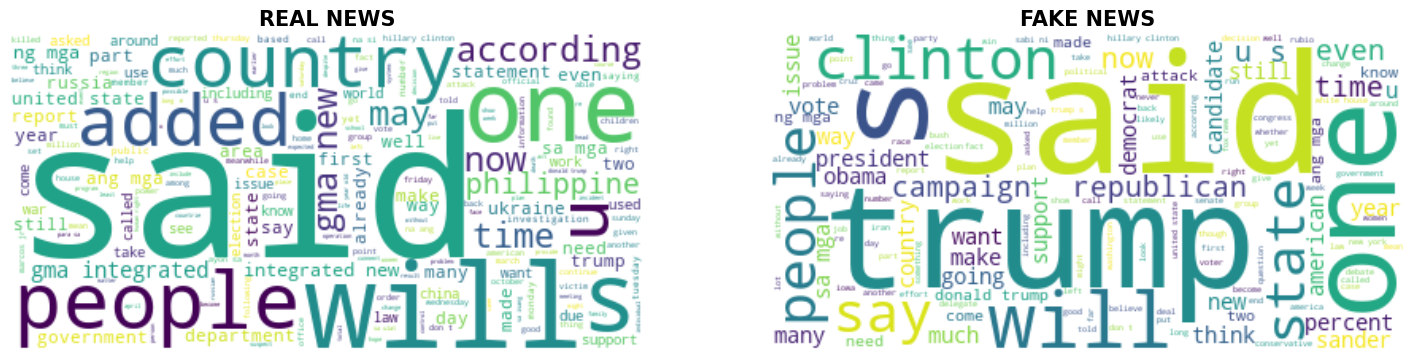

In [52]:
fig = plt.figure(figsize=(18, 13))
  
rows = 1
columns = 2
  
# Plotting the initial word cloud for REAL NEWS
fig.add_subplot(rows, columns, 1)
plt.imshow(wordcloud_rn, interpolation='bilinear')
plt.axis('off')
plt.title("REAL NEWS", fontsize=15, weight='bold')

# Plotting the initial word cloud for FAKE NEWS
fig.add_subplot(rows, columns, 2)
plt.imshow(wordcloud_fn, interpolation='bilinear')
plt.axis('off')
plt.title("FAKE NEWS", fontsize=15, weight='bold')

#### Initial Word Cloud for each label

As observed in the word clouds displayed above, they contain numerous extraneous elements like fillers and blank spaces (' '). To enhance data cleanliness, we will eliminate these fillers and blank spaces. Additionally, we will exclude stop words from the data to ensure that only essential and relevant words are shown.

### Excluding Stop Words, Fillers, and Blank Spaces

We will first retrieve the stop words from SpaCy and merge them with the fillers and blank spaces identified in the initial word clouds. Subsequently, we will instruct the WordCloud function to exclude these specific texts and characters when creating new word clouds for each label.

In [53]:
sp = spacy.load('en_core_web_sm')

# Accesing the stopwords package from SpaCy
all_stopwords = sp.Defaults.stop_words
# List of the fillers and blank space 
new_stopwords=["filler", " ", "S", "t", "s", "u", " "]
# Combining trhe stopwords, fillers, and blank space
comb_stopwords=list(new_stopwords)+list(all_stopwords)

# Generating the word clouds
wordcloud_rn = WordCloud(stopwords=comb_stopwords, background_color="white").generate(text_rn)
wordcloud_fn = WordCloud(stopwords=comb_stopwords, background_color="white").generate(text_fn)

We will now be generating new word clouds that exclude any texts and characters that we removed in the previous step.

Text(0.5, 1.0, 'FAKE NEWS')

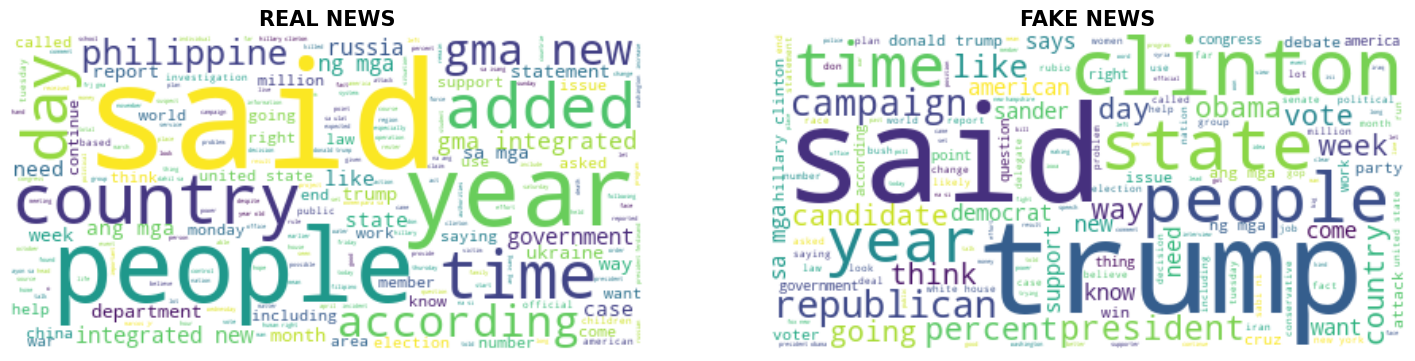

In [54]:
fig = plt.figure(figsize=(18, 13))
  
rows = 1
columns = 2
# Plotting the initial word cloud for Real News
fig.add_subplot(rows, columns, 1)
plt.imshow(wordcloud_rn, interpolation='bilinear')
plt.axis('off')
plt.title("REAL NEWS", fontsize=15, weight='bold')

# Plotting the initial word cloud for Fake News
fig.add_subplot(rows, columns, 2)
plt.imshow(wordcloud_fn, interpolation='bilinear')
plt.axis('off')
plt.title("FAKE NEWS", fontsize=15, weight='bold')

#### Updated Word Cloud for each label (Excluded Stopwords, Fillers, and Blank Spaces

In the depicted figure, the wordclouds appear more refined. For the real label, the most prominent words are 'said,' 'year,' 'people,' 'country,' 'added,' and 'time,' indicating their high occurrence in this category. On the other hand, for the fake label, words such as 'trump,' 'clinton,' 'state,' 'said,' and 'people' are found to be the most common occurrences.

### Excluding Verbs and Contractions

The next round of word clouds will be created, but this time, we will exclude verbs and contractions from the analysis. To gain more valuable insights from the data, we will treat verbs as stopwords, meaning they will not be included in the word clouds. However, existing libraries do not classify verbs as stopwords by default, so we will manually add them to the current list of stopwords. As a result, the focus will be on nouns, providing a clearer picture for the upcoming word clouds.

In [55]:
all_stopwords = sp.Defaults.stop_words
new_stopwords_nv=["filler", " ", "S", "t", "s", "u", " ", "added", "believe", "use", "saying", "said", "tell", "help", "run", "work", "says", "come", "told", "like", "know", "asked", "vote", "going", "make", "support", "debate" "sabi", "help", "think", "provide", "▯"]
comb_stopwords=list(new_stopwords_nv)+list(all_stopwords)

# Generating the word clouds
wordcloud_rn_nv = WordCloud(stopwords=comb_stopwords, background_color="white").generate(text_rn)
wordcloud_fn_nv = WordCloud(stopwords=comb_stopwords, background_color="white").generate(text_fn)

Next, we are going to generate new visualizations using the updated word clouds.

Text(0.5, 1.0, 'FAKE NEWS (mostly noun)')

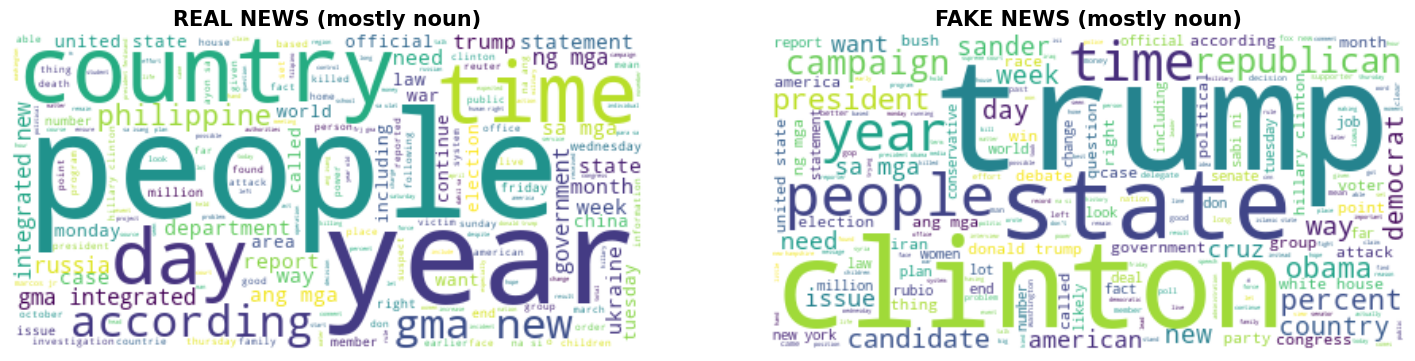

In [56]:
fig = plt.figure(figsize=(18, 13))
  
rows = 1
columns = 2
  
fig.add_subplot(rows, columns, 1)
plt.imshow(wordcloud_rn_nv, interpolation='bilinear')
plt.axis('off')
plt.title("REAL NEWS (mostly noun)", fontsize=15, weight='bold')
  
fig.add_subplot(rows, columns, 2)
plt.imshow(wordcloud_fn_nv, interpolation='bilinear')
plt.axis('off')
plt.title("FAKE NEWS (mostly noun)", fontsize=15, weight='bold')

#### Latest Word Cloud for each label (Excluded Stopwords, Fillers, Blank Spaces, Verbs, and Contractions)

From the word clouds shown above, it is evident that the real label prominently displays words like 'people', 'country', 'year', 'day', 'time', and 'according' in a visually larger size. Conversely, the fake label exhibits larger words such as 'trump', 'clinton', 'state', 'people', and 'year'.

### Word Cloud using TF-IDF

To start, we will be making a copy of the Real News data rn and Fake News fn.

In [57]:
rn_tf = rn[['Content']].copy(deep=True)
fn_tf = fn[['Content']].copy(deep=True)

#### Lemmatization

we will perform lemmatization using WordNetLemmatizer() first before converting the dataset into TF-IDF vectors o ensure that the words are in their base form and reduced to the most essential form. To achieve this, we have developed the clean_text function, which is responsible for cleaning the text and generating a text free from unnecessary noise and unwanted words.

In [58]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

rn_tf["text_clean"] = rn_tf["Content"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...'@#_]", " ", s).split()))
fn_tf["text_clean"] = fn_tf["Content"].apply(lambda s: ' '.join(re.sub(r'\d+', '', s).split()))

def clean_text(input_txt):
    words_rn_tf = input_txt.lower().split()
    words_rn_tf = [word for word in words_rn_tf if word not in stop_words and new_stopwords_nv] 
    words_rn_tf = [lemmatizer.lemmatize(word, pos='v') for word in words_rn_tf]
    words_rn_tf = [word for word in words_rn_tf if len(word) > 2]
    noise_free_text = " ".join(words_rn_tf) 
    return noise_free_text

rn_tf["text_clean"] = rn_tf["text_clean"].apply(lambda s: clean_text(s))


fn_tf["text_clean"] = fn_tf["Content"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...'@#_]", " ", s).split()))
fn_tf["text_clean"] = fn_tf["Content"].apply(lambda s: ' '.join(re.sub(r'\d+', '', s).split()))

def clean_text_s(input_txt):
    words_fn_tf = input_txt.lower().split()
    words_fn_tf = [word for word in words_fn_tf if word not in stop_words and new_stopwords_nv] 
    words_fn_tf = [lemmatizer.lemmatize(word, pos='v') for word in words_fn_tf]
    words_fn_tf = [word for word in words_fn_tf if len(word) > 2]
    noise_free_text = " ".join(words_fn_tf) 
    return noise_free_text

fn_tf["text_clean"] = fn_tf["text_clean"].apply(lambda s: clean_text(s))

### Vectorization

Once the texts have undergone lemmatization, we proceed to apply the TF-IDF vectorizer on both dataframes. To ensure a concise representation, we set the max_features value to 50, which allows us to select only the top 50 words with the highest TF-IDF scores. This approach helps us focus on the most significant words, making the analysis more efficient and meaningful.

In [59]:
tfidf_stop_words = list(text.ENGLISH_STOP_WORDS.union(["ll", "gt", "lt", "filler", "don", "ve"]))

# Initialization of TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=tfidf_stop_words, max_features=50)

# Implementing vectorization per class lemmatized data
df_vec_rn = tfidf_vectorizer.fit_transform(rn_tf["text_clean"])
df_vec_fn = tfidf_vectorizer.fit_transform(fn_tf["text_clean"])

After this step, the resulting matrix will be transformed into a dataframe.

In [60]:
df_rn_tf = pd.DataFrame(df_vec_rn.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_fn_tf = pd.DataFrame(df_vec_fn.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

#### Result data for real label

We can observe the frequency score of each word (from the top 50 words) for every data entry in the real label.

In [61]:
df_rn_tf

,american,ang,bush,campaign,clinton,come,country,cruz,debate,democratic,...,time,trump,use,vote,voters,want,white,work,year,years
0,0.174011,0.000000,0.000000,0.792248,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.912361,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.904551,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.765978,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.469024,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19355,0.000000,0.000000,0.184027,0.480736,0.0,0.000000,0.584979,0.0,0.075061,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.254922
19356,0.000000,0.212608,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.209289,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
19357,0.000000,0.142652,0.000000,0.126278,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.535698
19358,0.533801,0.091515,0.082696,0.081011,0.0,0.146142,0.098577,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.101313,0.0,0.0,0.0,0.389188,0.0,0.000000


#### Result data for fake label

The same can be observed in the fake label

In [62]:
df_fn_tf

,american,ang,bush,campaign,clinton,come,country,cruz,debate,democratic,...,time,trump,use,vote,voters,want,white,work,year,years
0,0.000000,0.652396,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.805157,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.945385,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.072881,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.691611,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.934469,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353571
4676,0.146994,0.000000,0.000000,0.000000,0.000000,0.000000,0.141825,0.0,0.000000,0.000000,...,0.000000,0.437625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4677,0.000000,0.000000,0.000000,0.036324,0.814231,0.033645,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.038983,0.000000,0.000000,0.000000,0.000000,0.264923,0.075645,0.114043
4678,0.050994,0.000000,0.065332,0.000000,0.000000,0.125597,0.098401,0.0,0.000000,0.052581,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155763,0.094185,0.141189,0.189208


Next, we will examine the top 50 words that have been chosen and arrange them based on the overall frequency scores in each data point for each category. We will employ the sum() function to calculate the total occurrence count of each word across all data points within a specific label. Once this is done, we will use the sort_values() method to arrange the words in ascending order, based on their total occurrence values.

In [63]:
tf_idf_counter_rn = df_rn_tf.T.sum(axis=1).sort_values(ascending=False)
tf_idf_counter_fn = df_fn_tf.T.sum(axis=1).sort_values(ascending=False)

#### Ranking words for the real label

In [64]:
tf_idf_counter_rn

tell            4560.113036
campaign        3959.669395
percent         1797.875784
republican      1251.411676
republicans     1233.373677
hillary         1224.879959
say             1220.750386
run             1154.048093
think           1096.438509
house           1091.803725
said            1086.332934
country         1074.357573
bush            1056.130806
presidential    1008.060859
clinton          996.501942
trump            996.235562
work             967.219250
party            946.475565
ang              942.669144
democratic       899.137173
political        895.903630
right            879.193339
years            874.158638
vote             838.262763
know             830.739443
american         827.386015
sanders          825.636804
people           820.355158
gop              795.886871
mga              785.688671
make             784.897437
government       734.073949
include          730.258929
national         724.077966
support          719.766264
time             706

#### Ranking words for the fake label

In [65]:
tf_idf_counter_fn

ang             1263.741782
say              644.522266
mga              624.188159
trump            589.116049
clinton          391.050758
state            389.227112
obama            369.198998
said             325.045540
president        316.288252
people           300.188150
make             269.246836
new              264.034604
campaign         245.643934
time             232.231609
party            223.355547
house            219.430520
republican       216.761185
tell             206.735868
news             200.368576
government       197.299773
year             194.780948
like             192.495434
vote             190.086788
percent          189.713331
come             184.656096
right            175.042540
think            172.286316
know             170.083072
sanders          169.391381
political        169.324674
presidential     166.144868
white            165.837185
republicans      165.472883
work             164.760870
use              164.388252
cruz             163

Here, the most frequent words in the real label are as follows:

- "tell" with a frequency of 4560.113036
- "campaign" with a frequency of 3959.669395
- "percent" with a frequency of 1797.875784
- "republican" with a frequency of 1251.411676
- "republicans" with a frequency of 1233.373677

On the other hand, the most common words in the fake label are:

- "ang" with a frequency of 1263.741782
- "say" with a frequency of 644.522266
- "mga" with a frequency of 624.188159
- "trump" with a frequency of 589.116049
- "clinton" with a frequency of 391.050758

To create the word cloud using TF-IDF, the "generate_from_frequencies()" function is utilized instead of the "generate()" function. 

In [66]:
wordcloud_tf_rn = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', colormap='Set2', collocations=False).generate_from_frequencies(tf_idf_counter_rn)

wordcloud_tf_fn = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', colormap='Set2', collocations=False).generate_from_frequencies(tf_idf_counter_fn)

Having created a word cloud for each label, we can now visualize and compare the differences in word frequency scores between them.

Text(0.5, 1.0, 'FAKE NEWS')

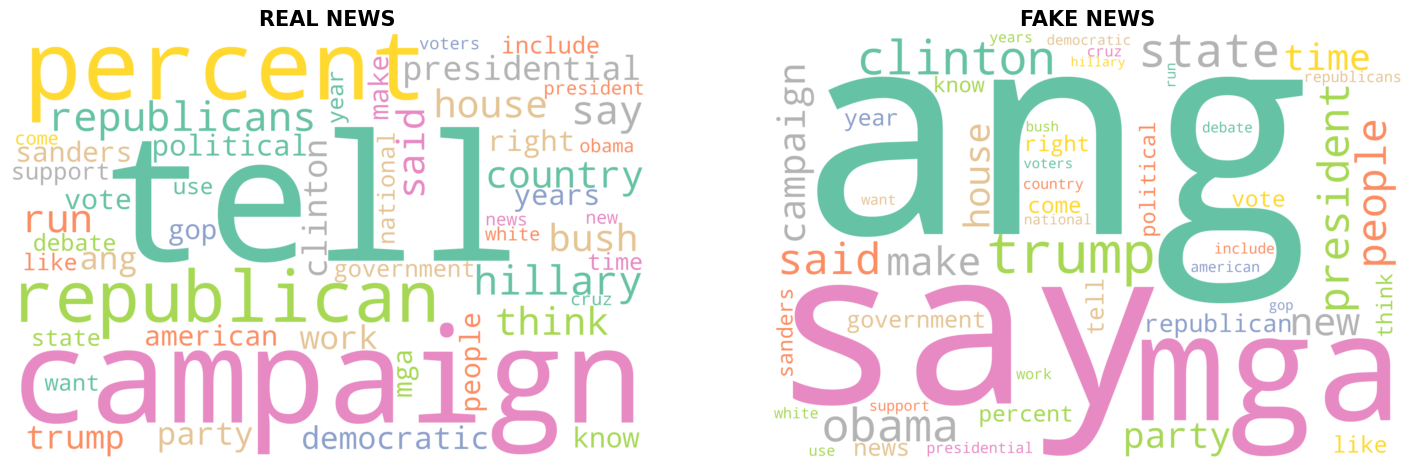

In [67]:
fig = plt.figure(figsize=(18, 13))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(wordcloud_tf_rn, interpolation='bilinear')
plt.axis("off")
plt.title("REAL NEWS", fontsize=15, weight='bold')

fig.add_subplot(rows, columns, 2)
plt.imshow(wordcloud_tf_fn, interpolation='bilinear')
plt.axis("off")
plt.title("FAKE NEWS", fontsize=15, weight='bold')

### Word Cloud after TF-IDF

As shown in figure above, it is clear that the top 5 words for the real label are "tell," "campaign," "percent," "republican," and "republicans." Conversely, the top 5 words for the fake label are "ang," "say," "mga," "trump," and "said." 

Nevertheless, relying solely on the word cloud might be misleading as some words appear almost as large as the actual top 5 words in each label. To get a more accurate understanding of the top words in each label, it is advisable to examine the ranking of words based on their frequency scores. This way, we can identify the most significant words in each class more effectively.

## What is the range of character counts of the news for each of the labels?

### REAL NEWS

Firstly, we'll create a duplicate of the dataframe that exclusively includes data from the real label. This duplicate will be referred to as "rn_2."

In [68]:
rn_2 = rn[['Content']].copy(deep=True)
rn_2

,Content
0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,"Kasama sa programa ang pananalangin, bulaklak ..."
4,Linisin ang Friendship Department dahil dadala...
...,...
24035,The winner of the special election in Cavite t...
24036,The remains of four people inside the Cessna p...
24037,A Kabataan Party-list representative visited t...
24038,The Philippine Coast Guard is expected to have...


In the real label, the length of each statement is determined by counting the number of words using the .count() function, and then adding 1 to account for the offset, which gives us the "length" variable. Additionally, the length of each statement is measured by the number of characters using the len() function to count the characters in each text data, resulting in the "LoR" variable.

Next, the "length" and "LoR" values are placed in separate columns within the rn_2 dataframe for further analysis and comparison.

In [69]:
rn_2['length'] = rn_2['Content'].str.count(' ') + 1
rn_2['LoR'] = rn_2['Content'].str.len()
rn_2

,Content,length,LoR
0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",257,1585
1,Kilala rin ang singer sa pagkumpas ng kanyang ...,153,920
2,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",52,342
3,"Kasama sa programa ang pananalangin, bulaklak ...",65,410
4,Linisin ang Friendship Department dahil dadala...,26,157
...,...,...,...
24035,The winner of the special election in Cavite t...,683,4130
24036,The remains of four people inside the Cessna p...,262,1481
24037,A Kabataan Party-list representative visited t...,288,1817
24038,The Philippine Coast Guard is expected to have...,333,2025


Afterward, the average length (number of words in a text data) and the average LoR (number of characters in a text data) are computed by using the .mean() function.

In [70]:
rn_2["length"].mean()

398.76947314049585

In [71]:
rn_2["LoR"].mean()

2432.63347107438

According to the findings above, the average statement length in the real label is approximately 399 words. Additionally, the average number of characters is approximately 2433 characters per statement.

### FAKE NEWS

Now, we will be doing the same process as what we did in the real label with fake label. The only difference is that we will be making a copy of the dataframe which only contain data under the fake label and will be renamed as fn_2

In [72]:
fn_2 = fn[['Content']].copy(deep=True)
fn_2

,Content
1496,Isiniwalat ng isang tribal leader ang kabalbal...
1497,Kilala ang Univeristy of the Philippines (UP) ...
1498,Ayon kay Tourism Secretary Bernadette Romulo-P...
1499,Sa opisyal na pagpapakilala ng mga taga-oposis...
1500,Hindi pinalampas ni dating Presidential Commun...
...,...
9329,Most conservatives who oppose marriage equalit...
9332,The freshman senator from Georgia quoted scrip...
9335,The State Department told the Republican Natio...
9338,"ADDIS ABABA, Ethiopia —President Obama convene..."


In [73]:
fn_2['length'] = fn_2['Content'].str.count(' ') + 1
fn_2['LoR'] = fn_2['Content'].str.len()
fn_2

,Content,length,LoR
1496,Isiniwalat ng isang tribal leader ang kabalbal...,423,2546
1497,Kilala ang Univeristy of the Philippines (UP) ...,172,1059
1498,Ayon kay Tourism Secretary Bernadette Romulo-P...,204,1251
1499,Sa opisyal na pagpapakilala ng mga taga-oposis...,112,683
1500,Hindi pinalampas ni dating Presidential Commun...,157,988
...,...,...,...
9329,Most conservatives who oppose marriage equalit...,293,1822
9332,The freshman senator from Georgia quoted scrip...,376,2212
9335,The State Department told the Republican Natio...,677,4076
9338,"ADDIS ABABA, Ethiopia —President Obama convene...",1145,6991


In [74]:
fn_2["length"].mean()

680.1438034188034

In [75]:
fn_2["LoR"].mean()

4057.1707264957263

From the data shown above, we observe that the average length of statements in the fake label is approximately 680 words. Additionally, the average length number of characters is found to be around 4057 characters.

Comparing the results of the two label, it is evident that the fake label has a greater average length of statements as compared to real label. The same can be said when it comes to the number of characters of each label.

## What are the sentiment score of the statements per labels?

## Feature Engineering

## Modeling

## Conclusion

## References


- Adityarahul. (2023). FakeNewsDetection. Kaggle. https://www.kaggle.com/code/adityarahul/fakenewsdetection

- Fake news classification. (2023, July 21). Kaggle. https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

- Sharanya. (2021). Fake news detection. Kaggle. https://www.kaggle.com/code/sharanya02/fake-news-detection
